# Introducción a la Inteligencia Artificial 
# Ejercicio # 12 - Integrador Clase #1 y Clase #2

In [39]:
import numpy as np
import pickle
from matplotlib import pyplot as plt
from ejercicio_8 import pca
from ejercicio_3 import k_means, k_means_loop

 1. Generar un dataset sintético que clusterice data en 4 clusters utilizando números random.
 
    a. Utilizar 4 dimensiones.
    
    b. Generar un dataset con 100K de muestras.

In [40]:
sintetic = np.random.normal(0, 1, size=(100000, 4))
centroids = sintetic[np.random.choice(len(sintetic), size=4, replace=False)]

 2. Cambiar algunos puntos de manera aleatoria y agregar NaN (0.1% del dataset).


In [45]:
sintetic_flatten = np.matrix.flatten(sintetic, order='C')
sintetic_flatten = np.random.permutation(sintetic_flatten)
nan_indices = np.random.randint(0, len(sintetic_flatten), size=np.round(0.01 * len(sintetic_flatten)).astype(int))
sintetic_flatten[nan_indices] = np.nan
sintetic = np.reshape(sintetic_flatten, (100000, 4))
print("Dataset :{}".format(sintetic))
print("Cantidad de NaN :{}".format(len(nan_indices)))
print("Cantidad de elementos :{}".format(len(sintetic_flatten)))

Dataset :[[ 1.59802713 -2.72881634  0.33345016  0.04681749]
 [ 0.60599602 -0.39713771  0.02883884  0.22190322]
 [-0.73994705 -2.79970055  0.32218682 -0.39589521]
 ...
 [        nan  0.50405957  0.57826258  0.3815732 ]
 [ 0.03930714 -1.52472746  2.19594262  0.74846891]
 [-0.90673514  0.61420713 -0.5699115   0.91932633]]
Cantidad de NaN :4000
Cantidad de elementos :400000


3. Guardar el dataset en un .pkl


In [31]:
pickle.dump(sintetic, open('sintetic' + '.pkl', 'wb'))

4. Cargar el dataset con Numpy desde el .pkl


In [32]:
sintetic = pickle.load(open('sintetic' + '.pkl', "rb"))

5. Completar NaN con la media de cada feature.


In [49]:
col_mean = np.nanmean(sintetic, axis=0)
inds = np.where(np.isnan(sintetic))
sintetic[inds] = np.take(col_mean, inds[1])

6. Calcular la norma l2, la media y el desvío de cada feature con funciones numpy vectorizadas.


In [50]:
norm_l2 = np.sqrt(np.sum(np.abs(sintetic**2), axis=0))
mean_feature = np.mean(sintetic, axis=0)
std_feature = np.std(sintetic, axis=0)

print("Norma l2 :{}".format(norm_l2))
print("Media por feature :{}".format(mean_feature))
print("Desviación estándar por feature :{}".format(std_feature))

Norma l2 :[310.48024689 309.62309638 310.666856   310.67554994]
Media por feature :[ 0.00380778 -0.00079331  0.00102626 -0.00225325]
Desviación estándar por feature :[0.98181736 0.97911388 0.98241432 0.98243977]


7. Agregar una columna a partir de generar una variable aleatoria exponencial a todos los puntos.


In [51]:
uniform_random_variable = np.random.uniform(low=0.0, high=1.0, size=sintetic.shape[0])
lambda_param = 5
exp = (-1 / lambda_param) * np.log(1 - uniform_random_variable)
exp = exp[:, None]
sintetic = np.append(sintetic, exp, axis=1)

8. Hacer el histograma de la distribución exponencial.


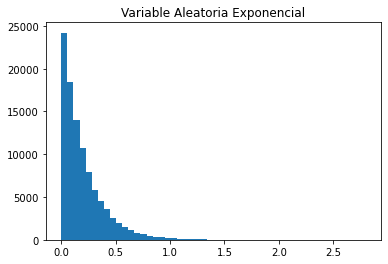

In [56]:
plt.hist(sintetic[:,4], bins=50)
plt.title("Variable Aleatoria Exponencial")
plt.show()

9. Aplicar PCA al dataset reduciendo a 2 dimensiones y graficar el cluster.


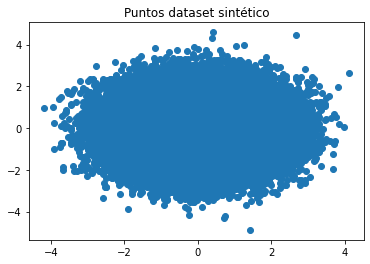

In [73]:
sintetic_pca = pca(sintetic, components=2)
plt.scatter(sintetic_pca[:,0], sintetic_pca[:,1])
plt.title("Puntos dataset sintético")
plt.show()

10. Hacer la clusterización con el k-means desarrollado en clase.


In [63]:
centroids, cluster_ids = k_means(sintetic_pca, 2, 1)

[[ 0.99463536  0.45941483]
 [-0.24031116  0.82624201]]
Iteration # 0
[[ 0.86452512 -0.25666329]
 [-0.6413014   0.19039183]]
Iteration # 1
[[ 0.82266334 -0.24609546]
 [-0.67772575  0.20273813]]
Iteration # 2
[[ 0.79653303 -0.24017211]
 [-0.700991    0.2113641 ]]
Iteration # 3
[[ 0.78008208 -0.23630379]
 [-0.71601903  0.2168977 ]]
Iteration # 4
[[ 0.7693362  -0.23332616]
 [-0.72623387  0.22025398]]
Iteration # 5
[[ 0.76231443 -0.2316073 ]
 [-0.73285951  0.22265827]]
Iteration # 6
[[ 0.75740438 -0.23063219]
 [-0.73740385  0.22454196]]
Iteration # 7
[[ 0.7543897  -0.23022151]
 [-0.74010235  0.22586136]]
Iteration # 8
[[ 0.75250113 -0.23006035]
 [-0.74174257  0.22677116]]
Iteration # 9
[[ 0.75113308 -0.23029445]
 [-0.74273753  0.2277204 ]]


11. Volver a graficar el cluster con lo obtenido en (10) y comparar resultados con (9).


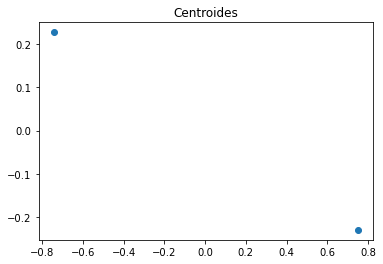

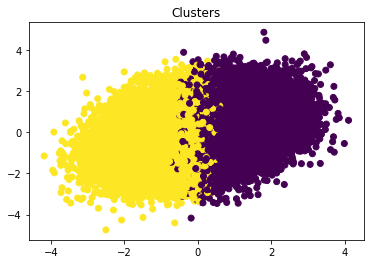

In [64]:
plt.scatter(centroids[:,0], centroids[:,1])
plt.title("Centroides")
plt.show()

plt.scatter(sintetic_pca[:,0], sintetic[:,1], c=cluster_ids)
plt.title("Clusters")
plt.show()


12. Analizar que pasa si los clusters comienzan a tener overlapping.


[[-0.02976708 -0.02487479]
 [-0.06860043 -0.10132092]]
Iteration # 0
[[ 0.33352777  0.64452255]
 [-0.38208957 -0.73836532]]
Iteration # 1
[[ 0.34746661  0.65626739]
 [-0.38070014 -0.71903624]]
Iteration # 2
[[ 0.35998981  0.66292768]
 [-0.38248685 -0.70435638]]
Iteration # 3
[[ 0.37165221  0.66567127]
 [-0.3868062  -0.6928138 ]]
Iteration # 4
[[ 0.3833562   0.66633347]
 [-0.39260567 -0.68241049]]
Iteration # 5
[[ 0.39455007  0.66527395]
 [-0.39931325 -0.67330542]]
Iteration # 6
[[ 0.40543349  0.6624162 ]
 [-0.40715618 -0.66523081]]
Iteration # 7
[[ 0.41522447  0.65864796]
 [-0.41504182 -0.65835822]]
Iteration # 8
[[ 0.42441264  0.65457985]
 [-0.42271838 -0.65196676]]
Iteration # 9
[[ 0.43314042  0.64936703]
 [-0.43106632 -0.64625753]]


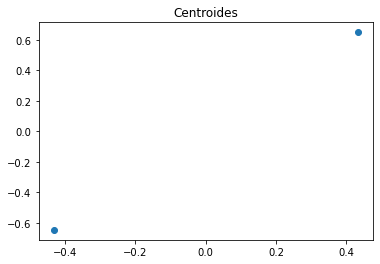

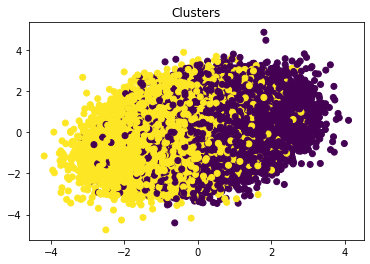

In [75]:
centroids, cluster_ids = k_means(sintetic_pca, 2, 0.1)
plt.scatter(centroids[:,0], centroids[:,1])
plt.title("Centroides")
plt.show()
plt.scatter(sintetic_pca[:,0], sintetic[:,1], c=cluster_ids)
plt.title("Clusters")
plt.show()